# Dacon Covid19 데이터분석 대회

- 2주차 데이터 업데이트
- 2020-03-30일자까지 데이터 업데이트 적용
- 1주차에 분석한 내용은 제외한 다른 추가적인 탐색, 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
region = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Region2.csv")
timeprovince = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeProvince2.csv")
timegender = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeGender2.csv")
timeage = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeAge2.csv")
time = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Time2.csv")
patientinfo = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/PatientInfo2.csv")
patientroute = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/PatientRoute2.csv")
case = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Case2.csv")
weather = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Weather2.csv")

In [4]:
# 칼럼명 이름 바꾸기
region.columns = ['지역코드','시도','구군','위도','경도','초등학교 수','유치원 수','대학교 수','academy_ratio','노인비율',
                 '독거노인비율','요양원 수']
region.head()

,지역코드,시도,구군,위도,경도,초등학교 수,유치원 수,대학교 수,academy_ratio,노인비율,독거노인비율,요양원 수
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [5]:
# 시도별로 노인비율 얼마나 많은지 그래프 표시해보기
sido_df = region.loc[(region['시도'] == region['구군'])]
sido_df.head()

,지역코드,시도,구군,위도,경도,초등학교 수,유치원 수,대학교 수,academy_ratio,노인비율,독거노인비율,요양원 수
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
26,11000,Busan,Busan,35.179884,129.074796,304,408,22,1.40,18.41,8.6,6752
43,12000,Daegu,Daegu,35.872150,128.601783,229,355,11,1.62,15.78,7.5,5083
52,13000,Gwangju,Gwangju,35.160467,126.851392,155,312,17,2.38,13.57,6.4,2852
58,14000,Incheon,Incheon,37.456188,126.705920,250,403,7,1.27,13.20,5.8,4497


In [6]:
from plotnine import *

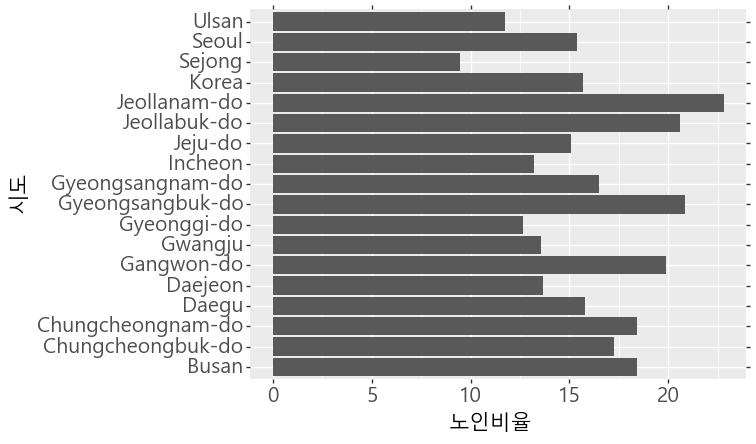

<ggplot: (192030301630)>

In [7]:
(ggplot(sido_df)
 +aes(x='시도',y='노인비율')
 +geom_bar(stat='identity')
 +coord_flip()
 +theme(text=element_text(size=15, family="Malgun Gothic"))
)

# 전라남도, 경상북도, 전라북도, 강원도가 노인비율의 상위권
# Korea 는 전국 노인비율의 평균값임

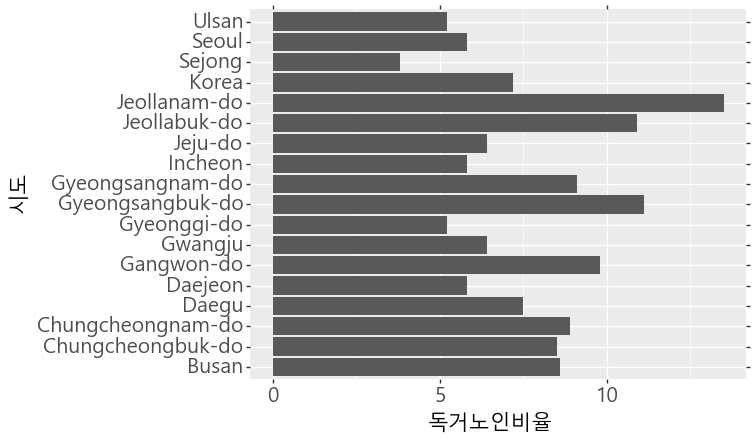

<ggplot: (-9223371844824199150)>

In [8]:
(ggplot(sido_df)
 +aes(x='시도',y='독거노인비율')
 +geom_bar(stat='identity')
 +coord_flip()
 +theme(text=element_text(size=15, family="Malgun Gothic"))
)

# 전라남도, 경상북도, 전라북도, 강원도가 노인비율의 상위권

In [9]:
patientinfo['state'].unique()

array(['released', 'isolated', 'deceased'], dtype=object)

In [10]:
# patientinfo 데이터프레임에서 노인인구비율이 높은 전라남도,전라북도, 경상북도, 강원도 데이터만 뽑아서
# state가 deceased(사망) 환자수도 많은지 관찰해보기

patientinfo.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [11]:
patientinfo['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [12]:
# state가 deceased(사망한) 데이터만 뽑기
death_df = patientinfo.loc[patientinfo['state'] == 'deceased']
death_df.shape

(53, 18)

In [13]:
death_df['province'].value_counts()

Gyeongsangbuk-do    28
Daegu               20
Busan                3
Gangwon-do           1
Gyeonggi-do          1
Name: province, dtype: int64

In [14]:
death_location = pd.DataFrame(death_df.groupby(['province'])['state'].count())
death_location.columns = ['사망자수']
death_location = death_location.reset_index()
death_location

,province,사망자수
0,Busan,3
1,Daegu,20
2,Gangwon-do,1
3,Gyeonggi-do,1
4,Gyeongsangbuk-do,28


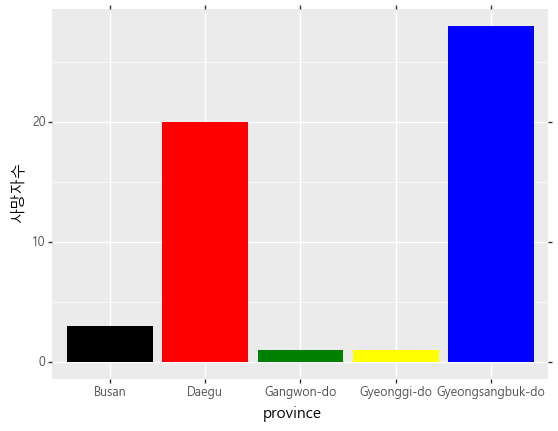

<ggplot: (192030378444)>

In [15]:
(ggplot(death_location)
 +aes(x='province', y='사망자수')
 +geom_bar(stat='identity', fill=('black','red','green','yellow','blue'))
 +theme(text=element_text(family='Malgun Gothic'))
)

## 확진자가 급증한 과도기 시점 직전의 슈퍼전파자들 추적해보기

- 날짜(시간)과 관련된 데이터들로 언제 갑자기 급증했는지 추적
- 환자정보와 관련된 데이터들로 알아낸 확진자 급증 날짜에 확진을 받은 환자들 추적
- 해당 환자들에 대한 전파경로 등 다양한 정보 알아내기

In [16]:
# 시간과 관련된 데이터 : time, timeage, timeprovince, time
# time 데이터부터 살펴보기
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [17]:
# timeage 데이터 살펴보기
timeage.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [18]:
# timeprovince 데이터 살펴보기
timeprovince.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [19]:
# timegender 데이터 살펴보기
timegender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [20]:
# 데이터들 살펴본 결과 분석 목적을 위해서는 time 데이터를 사용하는게 좋을듯
time.shape

(71, 7)

In [21]:
# 최근날짜 확인
time.tail()

,date,time,test,negative,confirmed,released,deceased
66,2020-03-26,0,364942,341332,9241,4144,131
67,2020-03-27,0,376961,352410,9332,4528,139
68,2020-03-28,0,387925,361883,9478,4811,144
69,2020-03-29,0,394141,369530,9583,5033,152
70,2020-03-30,0,395194,372002,9661,5228,158


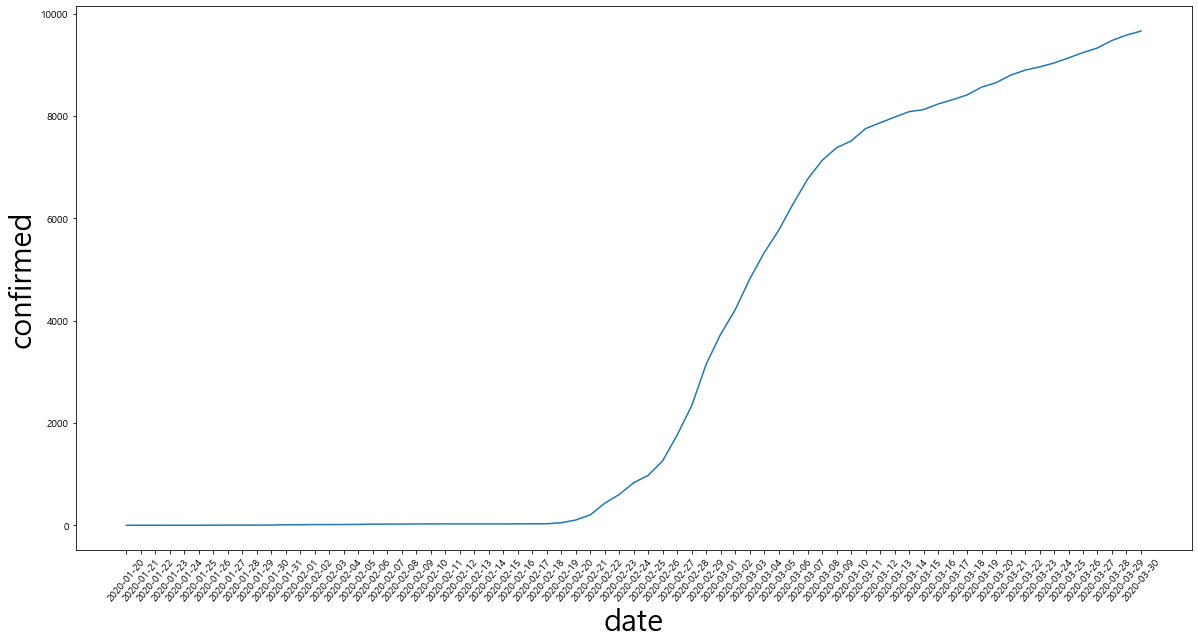

In [22]:
import seaborn as sns

# 날짜별로 확진자 그래프 그리기
plt.figure(figsize=(20,10))
plt.xticks(rotation=50)
plt.xlabel('date', fontsize=30)
plt.ylabel('confirmed', fontsize=30)
sns.lineplot(data=time, x='date', y='confirmed')

- 위 그래프로 봐서 급증하기 시작한 날짜는 대략 2020년 2월 20일,21일,24일,26일인 듯하다

* 해당 날짜에 확진받은 환자들 정보를 불러와보자

In [23]:
# confrimed_date 데이터 타입이 Datetime인지 str 인지 확인하기
patientinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2771 non-null   int64  
 1   global_num          1664 non-null   float64
 2   sex                 2765 non-null   object 
 3   birth_year          2414 non-null   float64
 4   age                 2758 non-null   object 
 5   country             2771 non-null   object 
 6   province            2771 non-null   object 
 7   city                2703 non-null   object 
 8   disease             19 non-null     object 
 9   infection_case      1843 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         650 non-null    float64
 12  contact_number      517 non-null    float64
 13  symptom_onset_date  389 non-null    object 
 14  confirmed_date      2771 non-null   object 
 15  released_date       709 non-null    object 
 16  deceas

In [24]:
patientinfo.head(2)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released


In [25]:
# 해당 날짜에 확진받은 확자들만 데이터 추출
increase_df = patientinfo.loc[patientinfo['confirmed_date'].str.contains('2020-02-20|2020-02-21|2020-02-24|2020-02-26')]
increase_df.shape

(261, 18)

In [26]:
increase_df.head(5)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
16,1000000017,83.0,male,1944.0,70s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,NaN,NaN,2020-02-20,2020-03-01,NaN,released
17,1000000018,111.0,male,2000.0,20s,Korea,Seoul,etc,NaN,etc,NaN,NaN,NaN,NaN,2020-02-20,NaN,NaN,isolated
18,1000000019,112.0,female,1941.0,70s,Korea,Seoul,Jongno-gu,NaN,contact with patient,5.0,1.000000e+09,NaN,NaN,2020-02-20,2020-03-08,NaN,released
19,1000000020,121.0,female,1944.0,70s,Korea,Seoul,Seongdong-gu,NaN,Seongdong-gu APT,NaN,1.000000e+09,NaN,NaN,2020-02-20,NaN,NaN,isolated
20,1000000021,136.0,male,1936.0,80s,Korea,Seoul,Jongno-gu,NaN,contact with patient,5.0,1.000000e+09,NaN,NaN,2020-02-20,2020-03-08,NaN,released


In [27]:
# 추출한 확진자들 중 누가 슈퍼전파자인지 확인하기 위해 contact_number 이라는 접촉자수 칼럼들 값 종류 보기
increase_df['contact_number'].unique()

array([      nan, 1.091e+03, 1.310e+02, 1.590e+02, 9.000e+00, 3.000e+00,
       2.000e+00, 7.000e+00, 0.000e+00, 2.700e+01, 1.900e+01, 1.100e+01,
       7.100e+01, 6.500e+01, 3.000e+01, 1.560e+02, 1.400e+01, 2.300e+01,
       4.600e+01, 1.500e+01, 6.000e+00, 4.000e+01, 2.200e+01, 4.100e+01,
       5.100e+01, 1.300e+02, 5.000e+00, 8.000e+00, 1.000e+00, 4.000e+00,
       3.100e+01, 8.700e+01])

In [28]:
# 수치가 자연상수 e로 구성되어 있긴 하지만 float형이기 때문에 내림차순으로 정리해준 후 정렬해보자.
increase_df['contact_number'].sort_values(ascending=False)

434     1091.0
472      159.0
617      156.0
435      131.0
1367     130.0
         ...  
2705       NaN
2706       NaN
2707       NaN
2708       NaN
2709       NaN
Name: contact_number, Length: 261, dtype: float64

In [29]:
# contact number가 1091명인 사람이 확진받은 날짜가 몇일인지 보자 => 2020년 02월 21일 확진자
increase_df.loc[increase_df['contact_number']==1091.0, ['patient_id','sex','age','confirmed_date']]

,patient_id,sex,age,confirmed_date
434,1100000001,male,10s,2020-02-21


In [30]:
# 2번째로 가장 많이 접촉한(159명)은 2020년 02월 24일 확진자
# 3번째로 가장 많이 접촉한(156명)은 2020년 02월 21일 확진자
increase_df.loc[(increase_df['contact_number']==159.0)|(increase_df['contact_number']==156.0),
                ['patient_id','sex','age','confirmed_date']]

,patient_id,sex,age,confirmed_date
472,1100000039,male,20s,2020-02-24
617,1300000005,male,30s,2020-02-21


In [31]:
patientroute.head()

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000002,5.0,2020-01-26,Seoul,Gwangjin-gu,store,37.563992,127.029534
1,1000000002,5.0,2020-01-27,Seoul,Gangbuk-gu,store,37.592057,127.018898
2,1000000002,5.0,2020-01-28,Seoul,Gangbuk-gu,store,37.591669,127.018420
3,1000000002,5.0,2020-01-29,Seoul,Seongbuk-gu,hospital,37.606498,127.092761
4,1000000002,5.0,2020-01-30,Seoul,Seongbuk-gu,hospital,37.612772,127.098167


In [32]:
# 특정 환자id를 만족하는 데이터를 출력하기 위해 patient_id 데이터 타입 int -> str로 변경
patientroute['patient_id'] = patientroute['patient_id'].astype(str)

In [33]:
# patientroute 데이터에서는 위에서 구한 환자들의 동선 데이터가 존재하지 않았다..
patientroute.loc[patientroute['patient_id'].str.contains("1100000001|1100000039|1300000005")]

,patient_id,global_num,date,province,city,type,latitude,longitude


## 날씨데이터(weather와 지역과 날짜별 확진자현황 데이터(timeprovince) 결합해 분석

In [37]:
# weather 데이터 사용 -> 날짜별 지역날씨 데이터 
# timeprovince 데이터의 날짜에 따른 지역별 확진자 데이터와 결합

# weather 데이터 미리보기 -> 날짜가 2016년 날짜부터 존재
# 코로나 확진자가 최초로 생긴 날짜 이후의 데이터만 활용해보자
weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,NaN,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,NaN,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,NaN,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,NaN,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,NaN,5.3,180.0,83.9


In [38]:
weather.tail()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
24794,50000,Jeollabuk-do,2020-03-29,8.1,0.7,15.9,NaN,5.3,110.0,53.4
24795,51000,Jeollanam-do,2020-03-29,10.4,7.1,14.4,NaN,6.4,50.0,62.6
24796,60000,Gyeongsangbuk-do,2020-03-29,6.4,1.9,12.5,0.0,6.2,180.0,78.6
24797,61000,Gyeongsangnam-do,2020-03-29,9.0,4.0,14.7,NaN,4.8,50.0,60.9
24798,70000,Jeju-do,2020-03-29,11.2,6.6,14.4,NaN,7.0,50.0,67.8


In [42]:
# 최초확진자가 발생한 날짜는 2020-01-20 
timeprovince.head(10)

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
5,2020-01-20,16,Daejeon,0,0,0
6,2020-01-20,16,Ulsan,0,0,0
7,2020-01-20,16,Sejong,0,0,0
8,2020-01-20,16,Gyeonggi-do,0,0,0
9,2020-01-20,16,Gangwon-do,0,0,0


In [51]:
timeprovince.tail(2)

,date,time,province,confirmed,released,deceased
1205,2020-03-30,0,Gyeongsangnam-do,95,65,0
1206,2020-03-30,0,Jeju-do,9,4,0


In [43]:
# weather 데이터에서 날짜가 2020-01-20일 이후 부터 추출하자
# weather 데이터 구성보기
weather.shape

(24799, 10)

In [44]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24799 entries, 0 to 24798
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   24799 non-null  int64  
 1   province               24799 non-null  object 
 2   date                   24799 non-null  object 
 3   avg_temp               24784 non-null  float64
 4   min_temp               24794 non-null  float64
 5   max_temp               24796 non-null  float64
 6   precipitation          9116 non-null   float64
 7   max_wind_speed         24790 non-null  float64
 8   most_wind_direction    24770 non-null  float64
 9   avg_relative_humidity  24779 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.9+ MB


In [47]:
# date 칼럼 datetime 형태로 변환해주기
weather['date'] = pd.to_datetime(weather['date'])

In [48]:
# 잘 변환됬는지 확인
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24799 entries, 0 to 24798
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   24799 non-null  int64         
 1   province               24799 non-null  object        
 2   date                   24799 non-null  datetime64[ns]
 3   avg_temp               24784 non-null  float64       
 4   min_temp               24794 non-null  float64       
 5   max_temp               24796 non-null  float64       
 6   precipitation          9116 non-null   float64       
 7   max_wind_speed         24790 non-null  float64       
 8   most_wind_direction    24770 non-null  float64       
 9   avg_relative_humidity  24779 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 1.9+ MB


 `pandas 문법기억하기`
  - isin 문법
  - pandas.date_range(start=' ', end=' ' ) 문법

In [54]:
# weather데이터에서 date가 2020-01-20~2020-03-29일까지 데이터만 뽑기
weather_df = weather[weather['date'].isin(pd.date_range(start='2020-01-20', end='2020-03-29'))]
weather_df.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
23679,10000,Seoul,2020-01-20,0.7,-3.3,5.5,NaN,5.7,270.0,46.8
23680,11000,Busan,2020-01-20,5.1,1.6,9.8,NaN,6.1,270.0,45.6
23681,12000,Daegu,2020-01-20,4.6,2.4,8.1,NaN,6.4,290.0,44.1
23682,13000,Gwangju,2020-01-20,4.0,1.2,7.9,NaN,3.3,270.0,63.1
23683,14000,Incheon,2020-01-20,1.2,-2.1,5.1,NaN,8.6,320.0,56.0


In [55]:
# 잘 추출됬는지 확인
weather_df.tail()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
24794,50000,Jeollabuk-do,2020-03-29,8.1,0.7,15.9,NaN,5.3,110.0,53.4
24795,51000,Jeollanam-do,2020-03-29,10.4,7.1,14.4,NaN,6.4,50.0,62.6
24796,60000,Gyeongsangbuk-do,2020-03-29,6.4,1.9,12.5,0.0,6.2,180.0,78.6
24797,61000,Gyeongsangnam-do,2020-03-29,9.0,4.0,14.7,NaN,4.8,50.0,60.9
24798,70000,Jeju-do,2020-03-29,11.2,6.6,14.4,NaN,7.0,50.0,67.8


In [56]:
# 두개의 데이터프레임 합치기 위해서 두 개의 행열 갯수 비교
timeprovince.shape

(1207, 6)

In [57]:
weather_df.shape

(1120, 10)

In [58]:
# timeprovince가 행이 더 많은데 이는 province에 세종 행이 추가되있기 때문이다.
# 세종에는 전에 분석했을 때와 똑같이 확진자가 많이 없기에 분석하고자하는 주제에 영향을 크게 주지 않을 것으로 예상
print(timeprovince['province'].unique())
print()
print()
print(weather_df['province'].unique())

['Seoul' 'Busan' 'Daegu' 'Incheon' 'Gwangju' 'Daejeon' 'Ulsan' 'Sejong'
 'Gyeonggi-do' 'Gangwon-do' 'Chungcheongbuk-do' 'Chungcheongnam-do'
 'Jeollabuk-do' 'Jeollanam-do' 'Gyeongsangbuk-do' 'Gyeongsangnam-do'
 'Jeju-do']


['Seoul' 'Busan' 'Daegu' 'Gwangju' 'Incheon' 'Daejeon' 'Ulsan'
 'Gyeonggi-do' 'Gangwon-do' 'Chungcheongbuk-do' 'Chungcheongnam-do'
 'Jeollabuk-do' 'Jeollanam-do' 'Gyeongsangbuk-do' 'Gyeongsangnam-do'
 'Jeju-do']


In [59]:
# 세종의 데이터 갯수를 빼면 weather_df 행의 갯수(1120개)와 동일한지 계산해보자.
timeprovince.loc[timeprovince['province']=='Sejong']

,date,time,province,confirmed,released,deceased
7,2020-01-20,16,Sejong,0,0,0
24,2020-01-21,16,Sejong,0,0,0
41,2020-01-22,16,Sejong,0,0,0
58,2020-01-23,16,Sejong,0,0,0
75,2020-01-24,16,Sejong,0,0,0
...,...,...,...,...,...,...
1129,2020-03-26,0,Sejong,44,8,0
1146,2020-03-27,0,Sejong,44,9,0
1163,2020-03-28,0,Sejong,44,9,0
1180,2020-03-29,0,Sejong,46,11,0


In [61]:
timeprovince_rows = 1207-71
gap = 1120 - timeprovince_rows
gap

# timeprovince 데이터에서 세종(Sejong)데이터를 빼더라도 16개가 더 있다.

-16

In [62]:
timeprovince_df = timeprovince.loc[timeprovince['province']!='Sejong']
timeprovince_df.shape

(1136, 6)

In [91]:
timeprovince_df.tail()

,date,time,province,confirmed,released,deceased
1202,2020-03-30,0,Jeollabuk-do,13,7,0
1203,2020-03-30,0,Jeollanam-do,9,3,0
1204,2020-03-30,0,Gyeongsangbuk-do,1298,772,38
1205,2020-03-30,0,Gyeongsangnam-do,95,65,0
1206,2020-03-30,0,Jeju-do,9,4,0


In [93]:
# timeprovince 데이터에서 2020-03-30일 데이터를 제거해보자.
timeprovince_df = timeprovince_df[~timeprovince_df['date'].isin([pd.Timestamp('20200330')])]

In [97]:
print(f"timeprovince_df 데이터개수:{timeprovince_df.shape}")
print(f"weather_df 데이터개수:{weather_df.shape}")

# 데이터 갯수 맞추는 데 성공

timeprovince_df 데이터개수:(1120, 6)
weather_df 데이터개수:(1120, 7)


In [98]:
timeprovince_df.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [102]:
weather_df = weather_df.reset_index(drop=True)
weather_df.head()

,province,date,avg_temp,min_temp,max_temp,max_wind_speed,most_wind_direction
0,Seoul,2020-01-20,0.7,-3.3,5.5,5.7,270.0
1,Busan,2020-01-20,5.1,1.6,9.8,6.1,270.0
2,Daegu,2020-01-20,4.6,2.4,8.1,6.4,290.0
3,Gwangju,2020-01-20,4.0,1.2,7.9,3.3,270.0
4,Incheon,2020-01-20,1.2,-2.1,5.1,8.6,320.0


In [106]:
# sort_values로 두 개의 데이터프레임 순서 맞추기

In [107]:
timeprovince_df = timeprovince_df.sort_values(by=['date'], ascending=True)
timeprovince_df

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
16,2020-01-20,16,Jeju-do,0,0,0
15,2020-01-20,16,Gyeongsangnam-do,0,0,0
14,2020-01-20,16,Gyeongsangbuk-do,0,0,0
13,2020-01-20,16,Jeollanam-do,0,0,0
...,...,...,...,...,...,...
1174,2020-03-29,0,Busan,117,85,3
1173,2020-03-29,0,Seoul,410,93,0
1188,2020-03-29,0,Gyeongsangnam-do,94,64,0
1179,2020-03-29,0,Ulsan,39,19,0


In [108]:
weather_df = weather_df.sort_values(by=['date'], ascending=True)
weather_df

,province,date,avg_temp,min_temp,max_temp,max_wind_speed,most_wind_direction
0,Seoul,2020-01-20,0.7,-3.3,5.5,5.7,270.0
15,Jeju-do,2020-01-20,8.4,7.1,10.9,6.0,320.0
14,Gyeongsangnam-do,2020-01-20,4.4,0.2,9.1,3.6,270.0
13,Gyeongsangbuk-do,2020-01-20,3.6,-0.4,6.9,7.5,270.0
12,Jeollanam-do,2020-01-20,4.9,2.8,8.8,10.2,290.0
...,...,...,...,...,...,...,...
1105,Busan,2020-03-29,10.4,6.4,15.1,5.3,50.0
1104,Seoul,2020-03-29,8.7,1.3,16.1,4.6,290.0
1118,Gyeongsangnam-do,2020-03-29,9.0,4.0,14.7,4.8,50.0
1110,Ulsan,2020-03-29,8.7,5.4,13.0,4.5,340.0


In [118]:
weather_df.tail()

,province,date,avg_temp,min_temp,max_temp,max_wind_speed,most_wind_direction
1105,Busan,2020-03-29,10.4,6.4,15.1,5.3,50.0
1104,Seoul,2020-03-29,8.7,1.3,16.1,4.6,290.0
1118,Gyeongsangnam-do,2020-03-29,9.0,4.0,14.7,4.8,50.0
1110,Ulsan,2020-03-29,8.7,5.4,13.0,4.5,340.0
1119,Jeju-do,2020-03-29,11.2,6.6,14.4,7.0,50.0


In [119]:
weather_remove_df = weather_df.drop(['province','date'], axis=1)
weather_remove_df.head()

,avg_temp,min_temp,max_temp,max_wind_speed,most_wind_direction
0,0.7,-3.3,5.5,5.7,270.0
15,8.4,7.1,10.9,6.0,320.0
14,4.4,0.2,9.1,3.6,270.0
13,3.6,-0.4,6.9,7.5,270.0
12,4.9,2.8,8.8,10.2,290.0


In [121]:
timeweather = pd.concat([timeprovince_df, weather_remove_df], axis=1)

In [125]:
# 결측치 행 제거 후 몇일까지 데이터가 존재하는지 보자.
timeweather_df = timeweather.dropna(axis=0)
timeweather_df.tail()

,date,time,province,confirmed,released,deceased,avg_temp,min_temp,max_temp,max_wind_speed,most_wind_direction
1115,2020-03-25,0.0,Chungcheongbuk-do,38.0,13.0,0.0,8.1,0.7,15.9,5.3,110.0
1116,2020-03-25,0.0,Chungcheongnam-do,123.0,65.0,0.0,10.4,7.1,14.4,6.4,50.0
1117,2020-03-25,0.0,Jeollabuk-do,10.0,7.0,0.0,6.4,1.9,12.5,6.2,180.0
1118,2020-03-25,0.0,Jeollanam-do,8.0,3.0,0.0,9.0,4.0,14.7,4.8,50.0
1119,2020-03-25,0.0,Gyeongsangbuk-do,1262.0,538.0,28.0,11.2,6.6,14.4,7.0,50.0


In [126]:
# 2020-01-20 ~ 2020-03-25 데이터로 날짜별 & 확진자 & 날씨 관련성 분석하기 